In [2]:
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
city = pd.read_excel('city.xlsx', index_col=0)
city

,City,Metro,Population (mln),Income (kUSD),Area (k sq. km)
0,Tokyo,1,13.515,46.17,2.19
1,New York,1,8.398,63.80,0.78
2,Beijing,1,21.516,15.82,16.41
3,Moscow,1,12.537,24.70,2.51
4,Seoul,1,9.734,43.54,0.61
5,London,1,8.982,57.09,1.57
6,Mumbai,1,20.668,9.70,0.60
7,São Paulo,1,12.398,15.51,1.52
8,Delhi,1,31.400,4.50,1.48
9,Cairo,0,20.901,3.63,3.09


### *Візуалізація залежностей кількості населення міста від площі міста та середнього доходу населення міста від кількості населення.*

In [16]:
# Визначаємо дані для першого графіка
x_data = city['Population (mln)']
y_data = city['Area (k sq. km)']

# Визначаємо дані для другого графіка
x_1_data = city['Income (kUSD)']
y_1_data = city['Population (mln)']

# Створюємо підграфіки з заголовками
fig = make_subplots(rows=1, cols=2, subplot_titles=('Залежність населення міста <br> від площі міста', 'Залежність середнього доходу <br> від кількості населення'))

# Додаємо перший графік на перший підграфік
fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers', name = 'Залежність населення від площі'), row=1, col=1)

# Додаємо другий графік на другий підграфік
fig.add_trace(go.Scatter(x=x_1_data, y=y_1_data, mode='lines+markers', name = 'Залежність середнього доходу<br>від кількості населення '), row=1, col=2)

# Задаємо назви осі x та y обох графіків
fig.update_layout(xaxis_title='Population (mln)',
                  yaxis_title='Area (k sq. km)',
                  xaxis1_title='Income (kUSD)',
                  yaxis1_title='Population (mln)')

### *Матриця кореляції та її візуалізація.*

In [17]:
df_corr = city.corr()
df_corr

,Metro,Population (mln),Income (kUSD),Area (k sq. km)
Metro,1.000000,-0.290895,0.559258,0.006206
Population (mln),-0.290895,1.000000,-0.651233,0.379163
Income (kUSD),0.559258,-0.651233,1.000000,-0.194423
Area (k sq. km),0.006206,0.379163,-0.194423,1.000000


In [26]:
fig =go.Figure()
fig.add_trace(go.Heatmap(x=df_corr.columns, y = df_corr.index, z = df_corr, colorscale='Greens'))

### *Звіт побудований за допомогою Sweetviz*

In [27]:
import sweetviz as sv

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



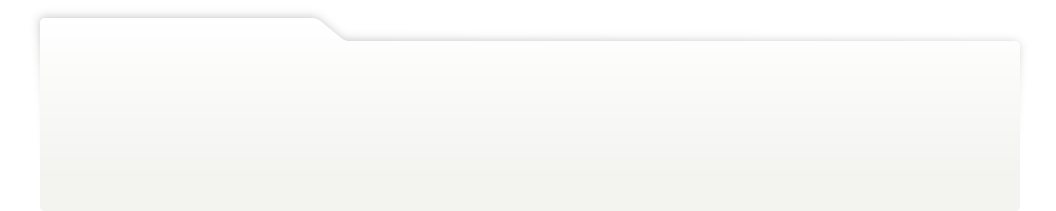
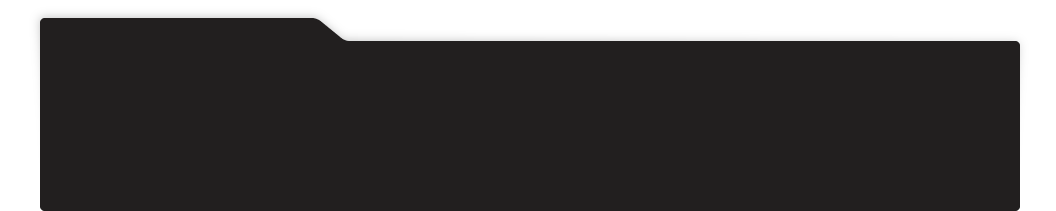
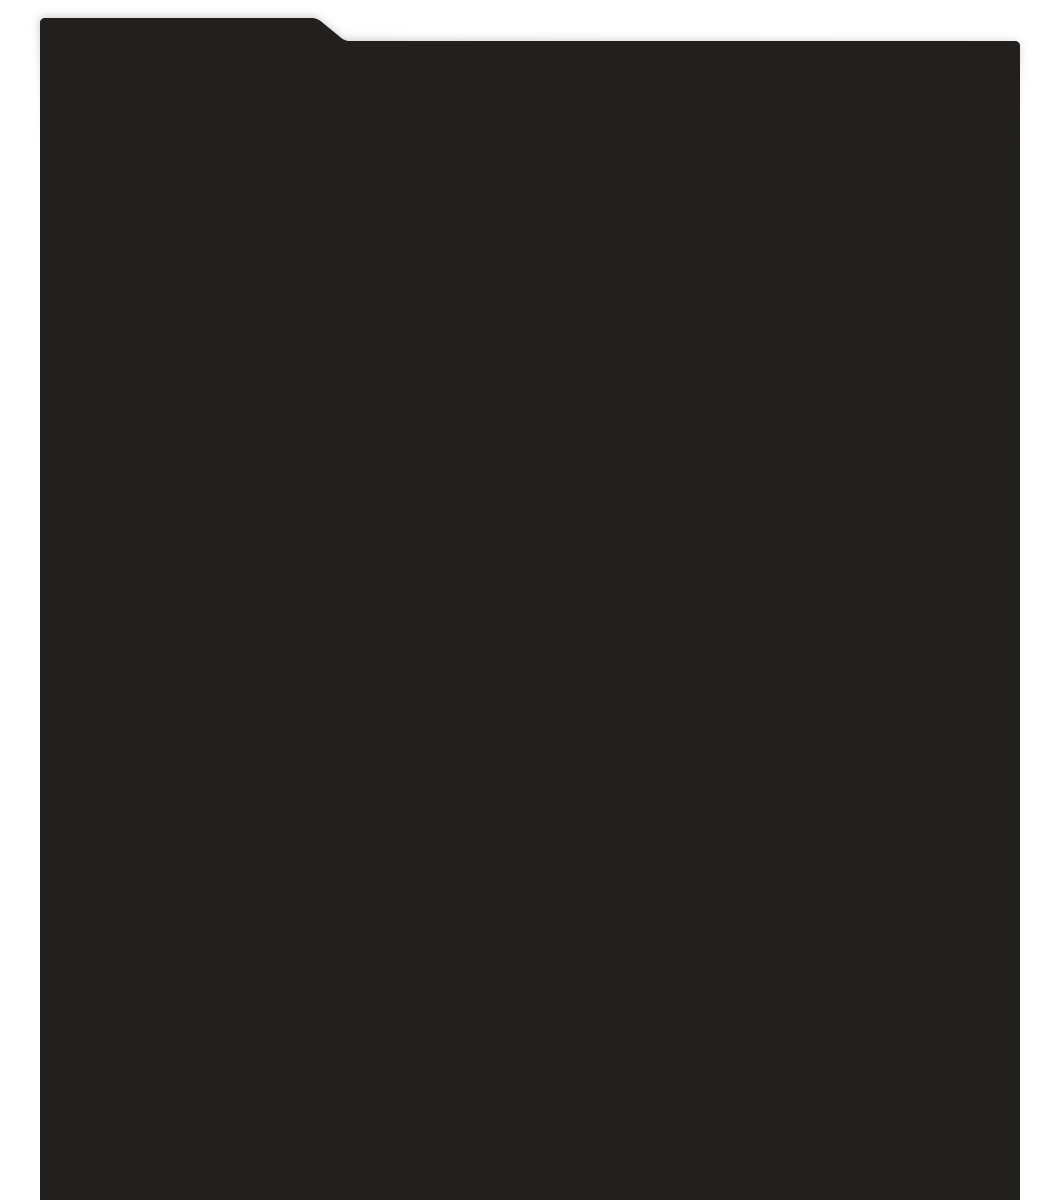
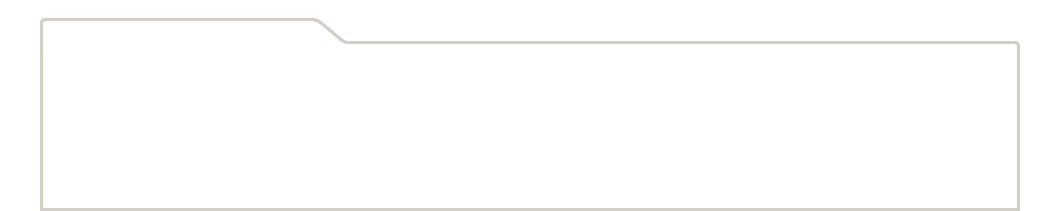
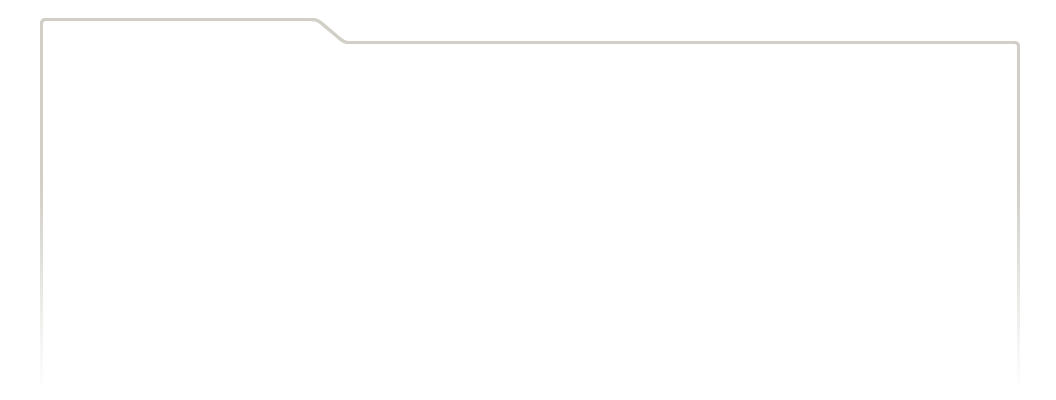
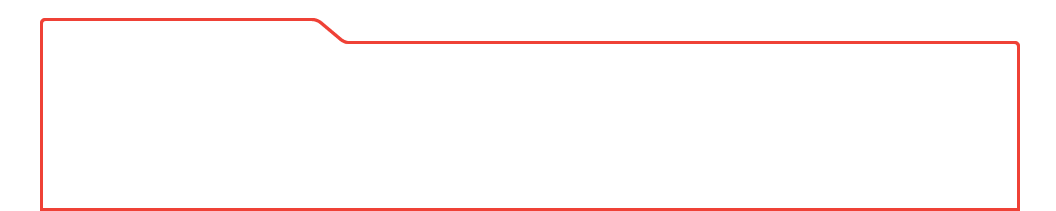
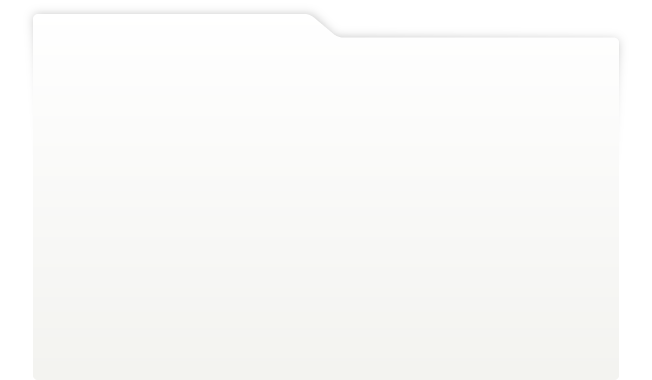
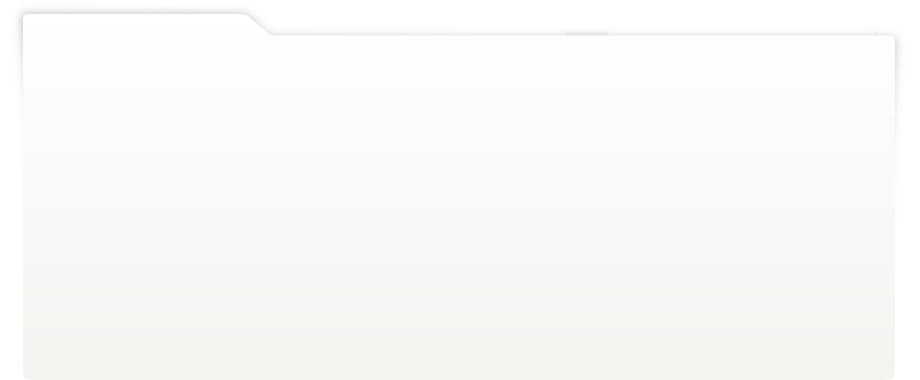
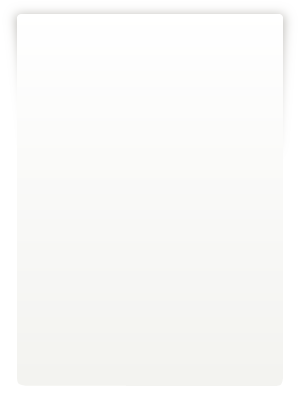
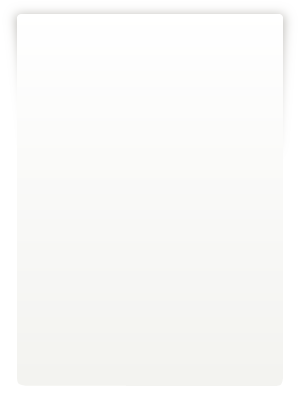
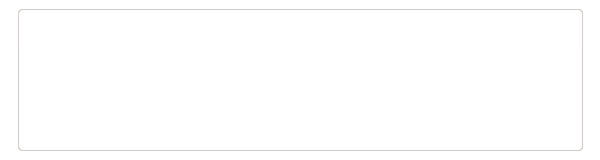
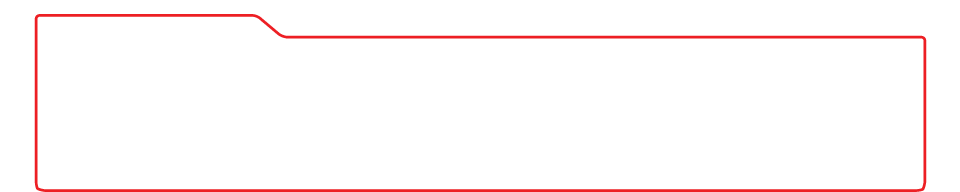
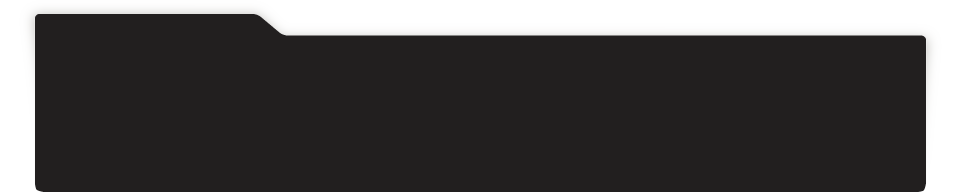
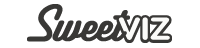
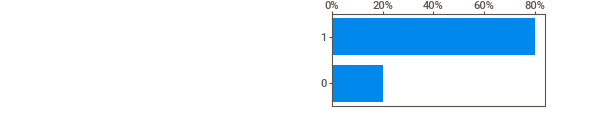
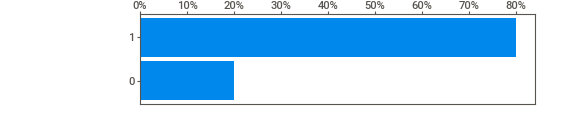
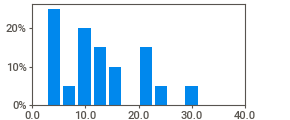
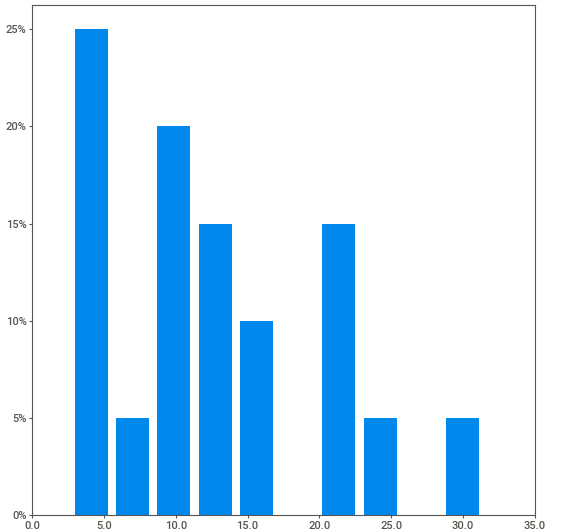
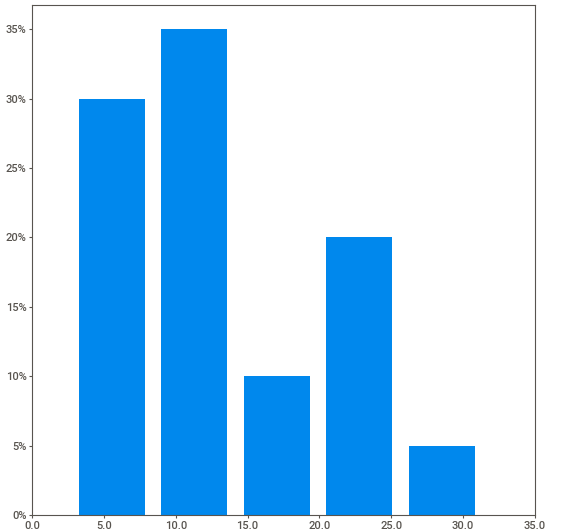
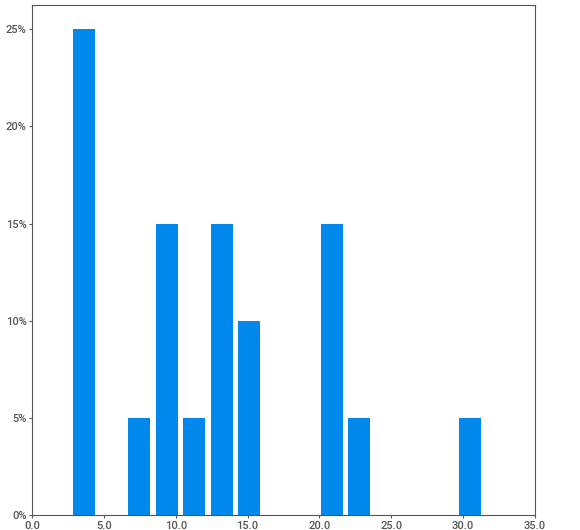
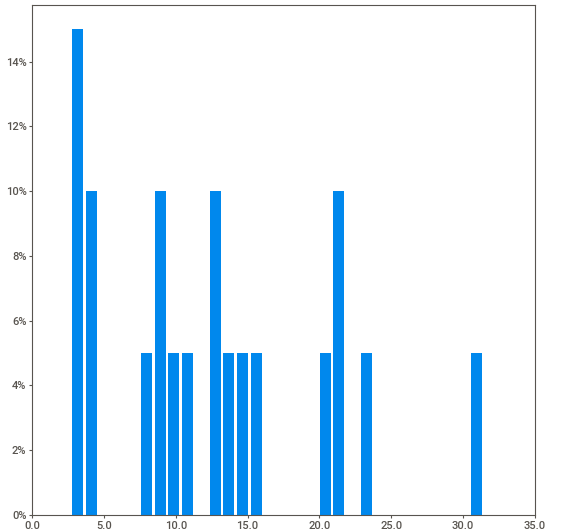
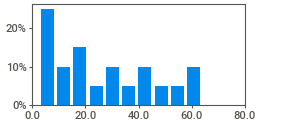
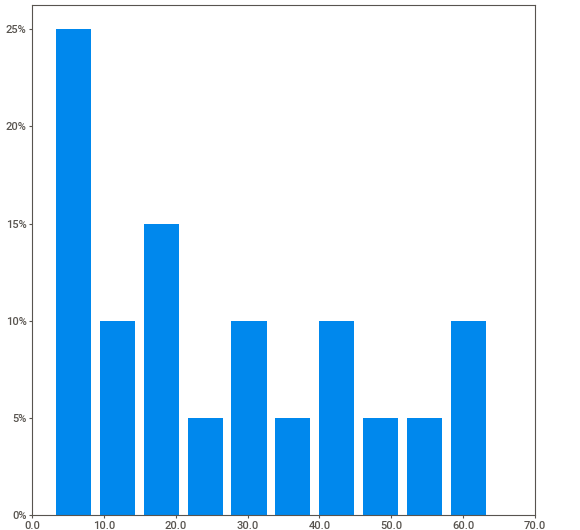
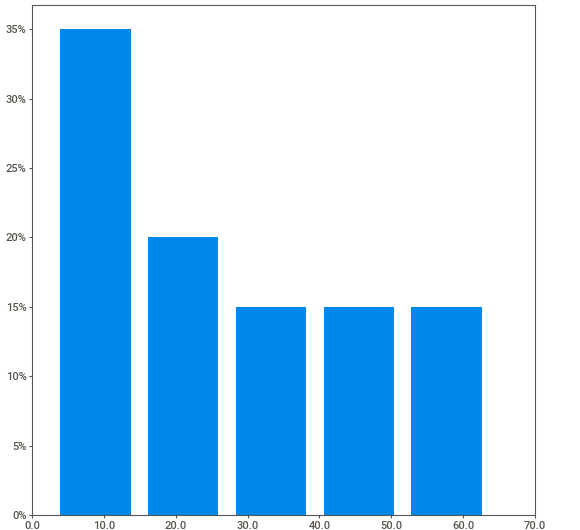
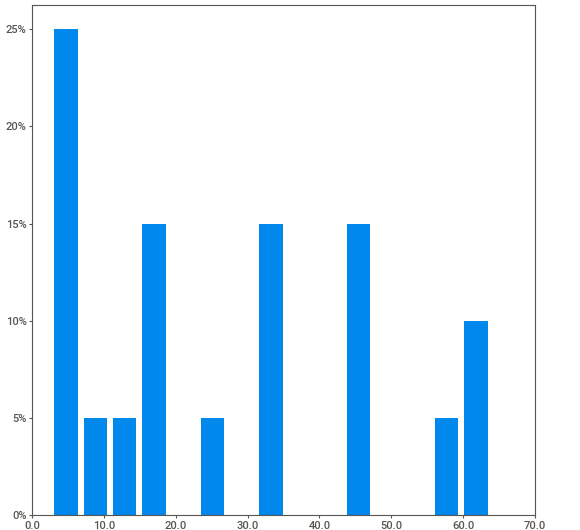
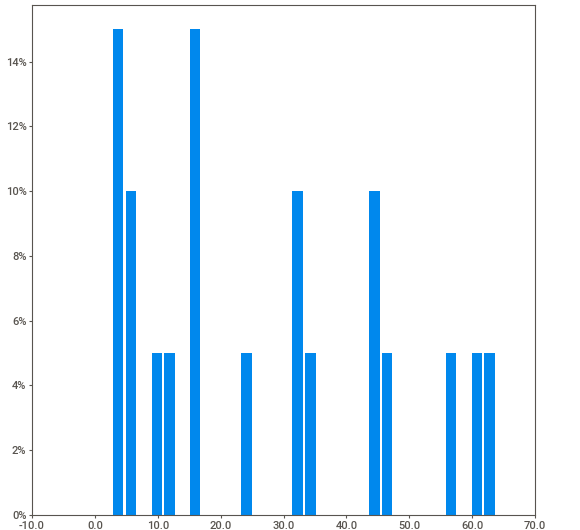
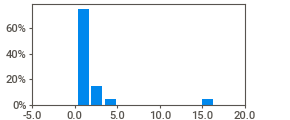
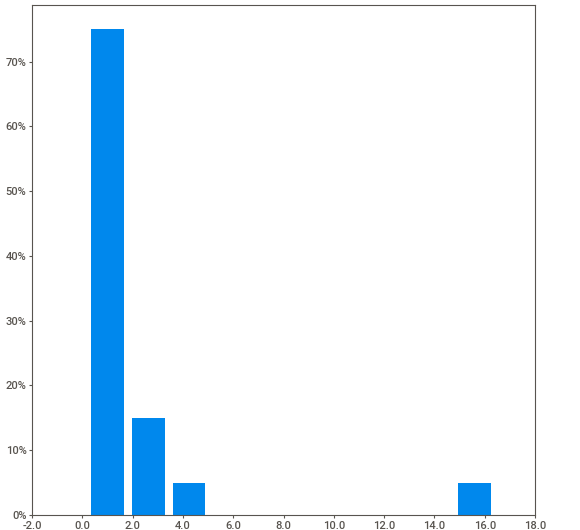
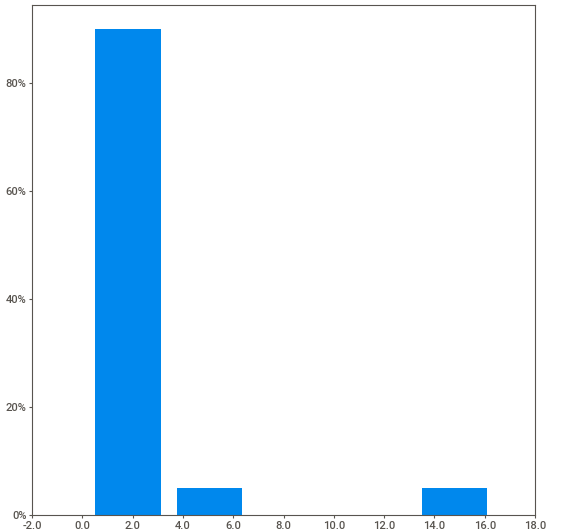
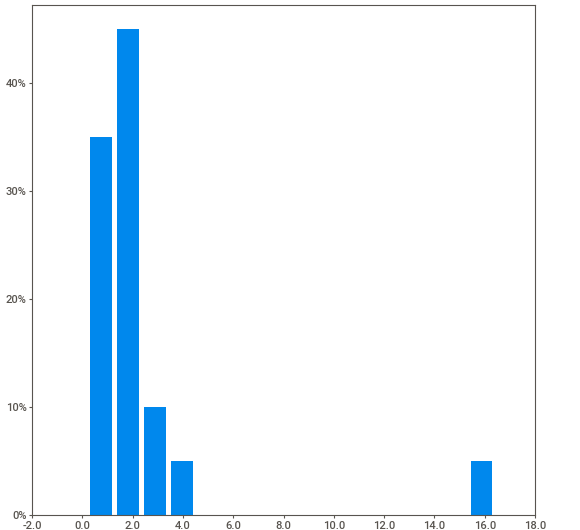
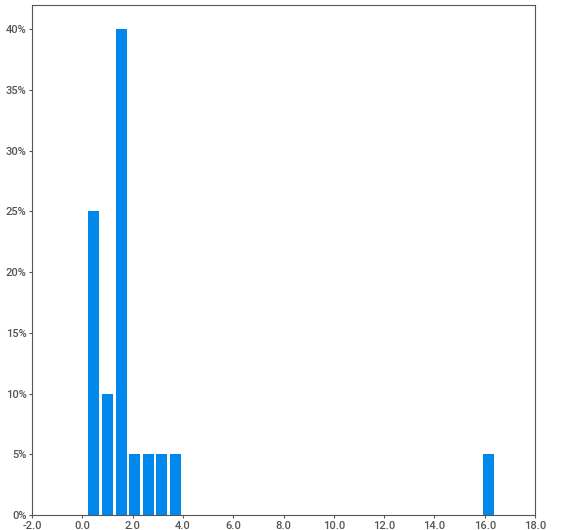
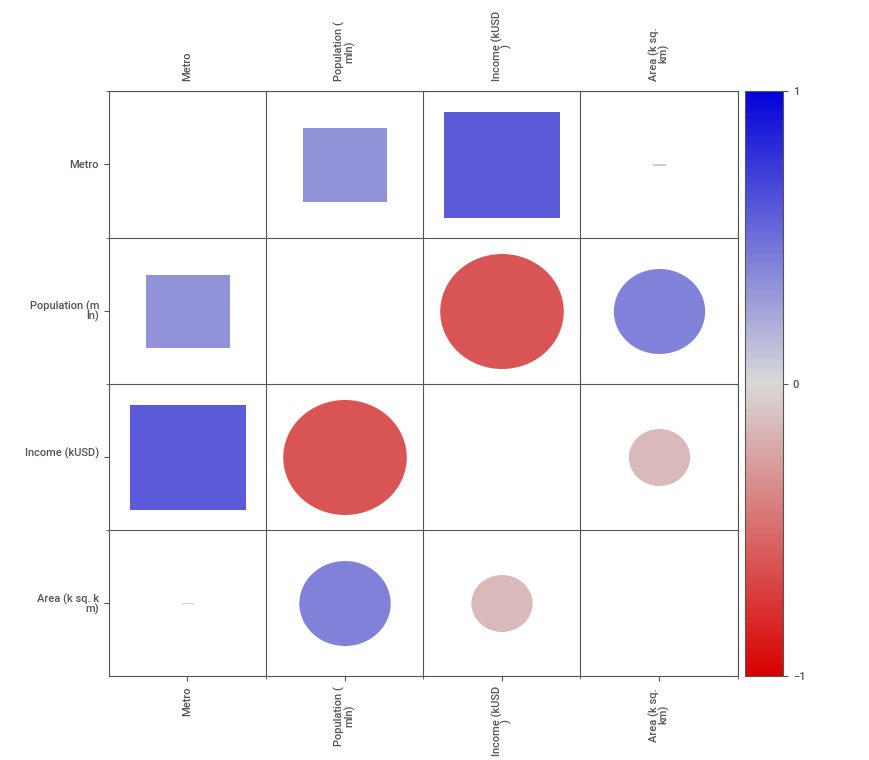
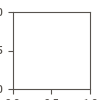

In [33]:
sweetviz_city = sv.analyze(city)
sweetviz_city.show_html()
sweetviz_city.show_notebook()

### *Звіт побудований за допомогою Pandas Profiling*

In [46]:
import ydata_profiling as yp
report = yp.ProfileReport(city)
report




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
report.to_file('Zvit_pandas_profiling.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### *Порівняння звітів*

##### *Звіт побудований за допомогою Pandas Profiling сприймається дещо краще, ніж звіт побудований за допомогою Sweetviz. Зокрема зазначений звіт має більш чітку і зрозумілішу структуру, легше читається, а також краще представлений в частині інтерактивності даних.     На мою думку при роботі з більш великими масивами даних (наприклад експортно-імпортні операції) переваги звіту побудованого за допомогою Pandas Profiling будуть ще більш відчутні.*